In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import japanize_matplotlib
import datetime as dt
# 県名の英語/日本語対応
EN_pref = ['ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 
           'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara','Wakayama','Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki','Kagoshima','Okinawa']
JP_pref = ["全国", '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '山梨県', '長野県',  '岐阜県', '静岡県', '愛知県', '三重県',
           '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'] 
JP_pref_of = dict(zip(EN_pref, JP_pref))
# 厚労省CSVを読込む
# 新規感染者
new_case = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv')
new_case["Date"] = pd.to_datetime(new_case["Date"])
new_case = new_case.set_index("Date")
# 累積死亡者
total_death = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv")
total_death["Date"] = pd.to_datetime(total_death["Date"])
total_death = total_death.set_index("Date")
# 入院治療
hospitalized_case = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/requiring_inpatient_care_etc_daily.csv")
hospitalized_case["Date"] = pd.to_datetime(hospitalized_case["Date"])
hospitalized_case = hospitalized_case.set_index("Date")
# 重症者
severe_case = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv")
severe_case["Date"] = pd.to_datetime(severe_case["Date"])
severe_case = severe_case.set_index("Date")
# 全国および各県の累積陽性数のオーダーを取得する
total_case = new_case["ALL"]
total_case_order = np.log10(total_case.sum()).astype(int)+1
pref_case_order = np.log10(new_case.loc[:,"Hokkaido":].sum(axis=0).max()).astype(int)+1


In [ ]:
cc = jp_df.cases.cumsum().diff(tw)
Rt = (cc/cc.shift(tw))**(gd/tw)


In [2]:
# グラフ描画関数
def plot_pref(pref_set, back_weeks=-1):
    cols = 3
    rows = np.ceil(len(pref_set)/cols).astype(int)
    fig, ax = plt.subplots(rows, cols, figsize=(8*cols, 6*rows))
    if back_weeks == -1:
        start_date = new_case.index[0]
    else:
        start_date = dt.datetime.today()-dt.timedelta(weeks=back_weeks)
    for pid, pref in enumerate(pref_set):
        a = ax.flatten()[pid]
        nc = new_case[pref] # 当該県の新規陽性数
        td = total_death[pref] # 当該県の死亡数
        hc = hospitalized_case["({:s}) Requiring inpatient care".format(pref)] # 当該県の入院治療を必要とする人数
        sc = severe_case[pref] # 当該県の重症数
        # 累積陽性・死亡数
        a.plot( nc.cumsum(), label="累積陽性数", color="C0", lw=2, zorder=10 )
        a.plot( td, label="累積死亡数", color="C1", lw=2, zorder=10 )
        # 新規陽性・死亡数
        a.fill_between( nc.index, nc.rolling(7).mean(), lw=0, color="C0", label="新規陽性数",alpha=0.25 )
        a.fill_between( td.index, td.diff().rolling(7).mean(), lw=0, color="C1", label="新規死亡数",alpha=0.25 )
        # 入院・重症
        a.plot( hc, color="C2", label="入院治療数", ls='--' )
        a.plot( sc, color="C4", label="重症数", ls='--' )
        # グラフの縦軸を整える
        a.set_yscale('log')
        if pref == "ALL":
            a.set_ylim([1,10**total_case_order])
            a.legend(loc='upper left')
        else:
            a.set_ylim([1, 10**pref_case_order])
        a.set_title(JP_pref_of[pref])
        ## x軸の主目盛りを修正
        a.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
        a.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
        a.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
        a.set_xlim((start_date, nc.index[-1]))
        plt.setp(a.get_xticklabels(which='major'), rotation=90)
        ## カラム間の調整
        plt.subplots_adjust(wspace=0.1, hspace=0.25)
    return fig, ax

In [3]:
nc

NameError: name 'nc' is not defined

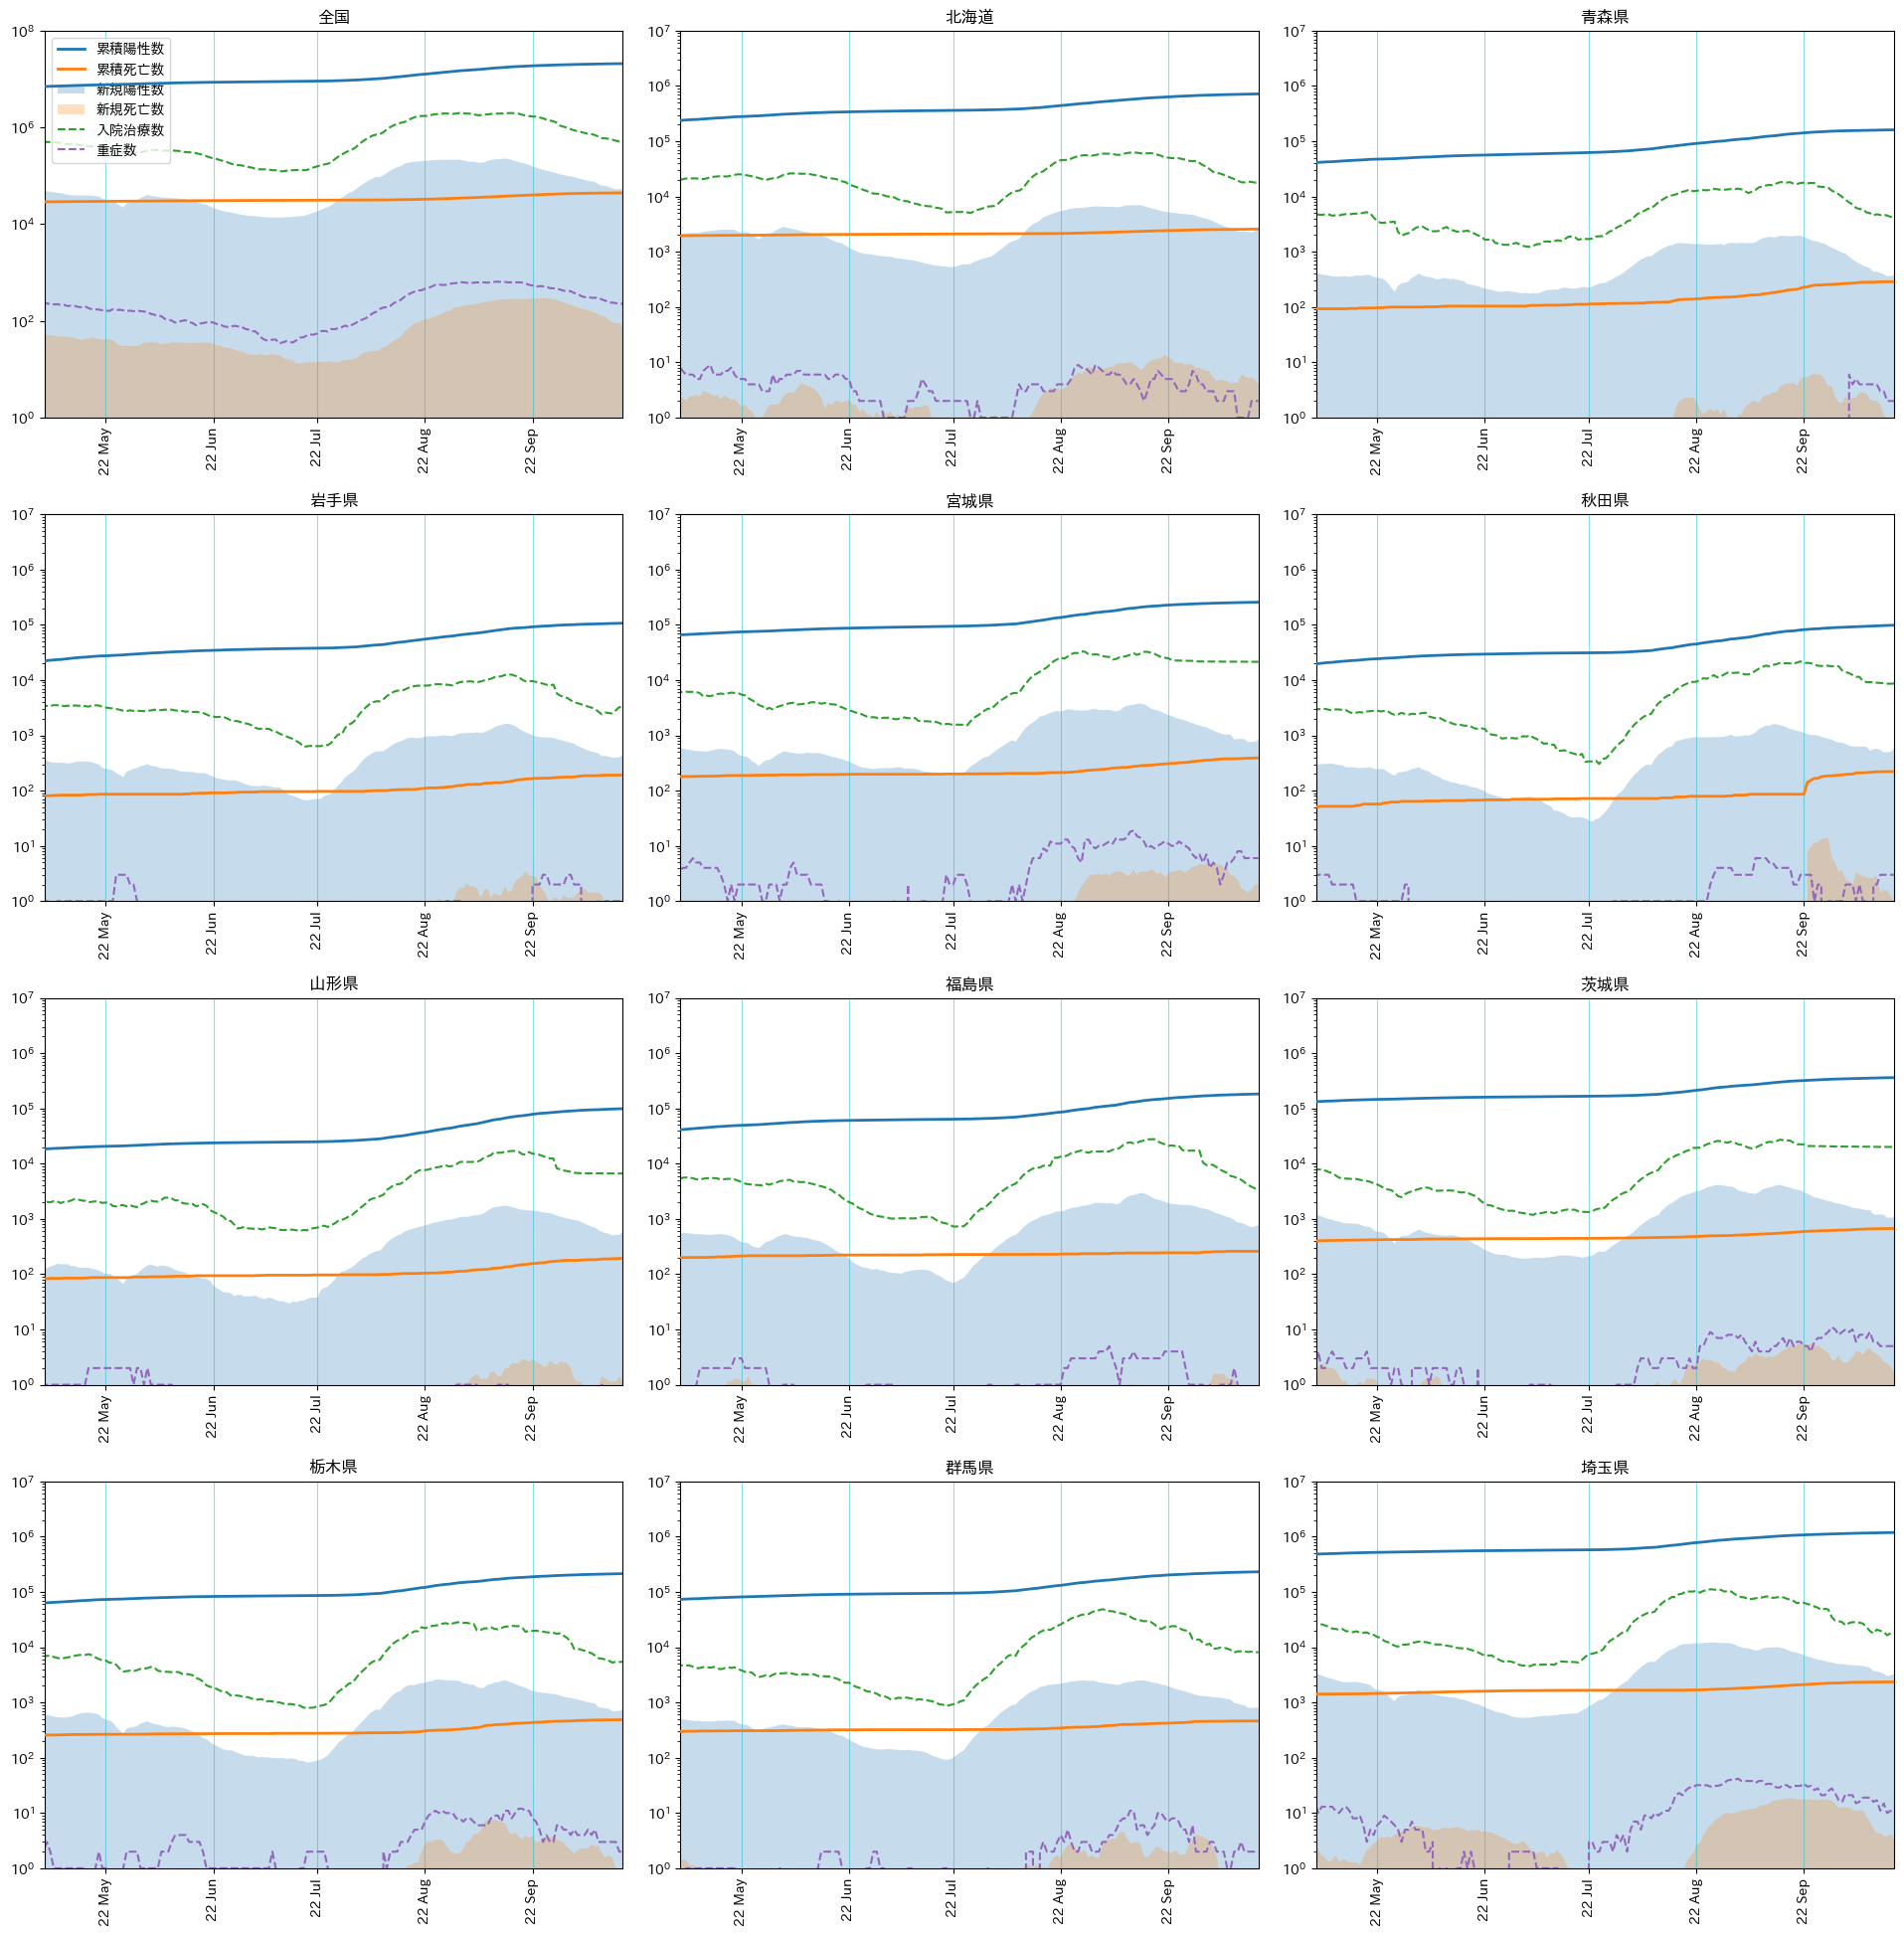

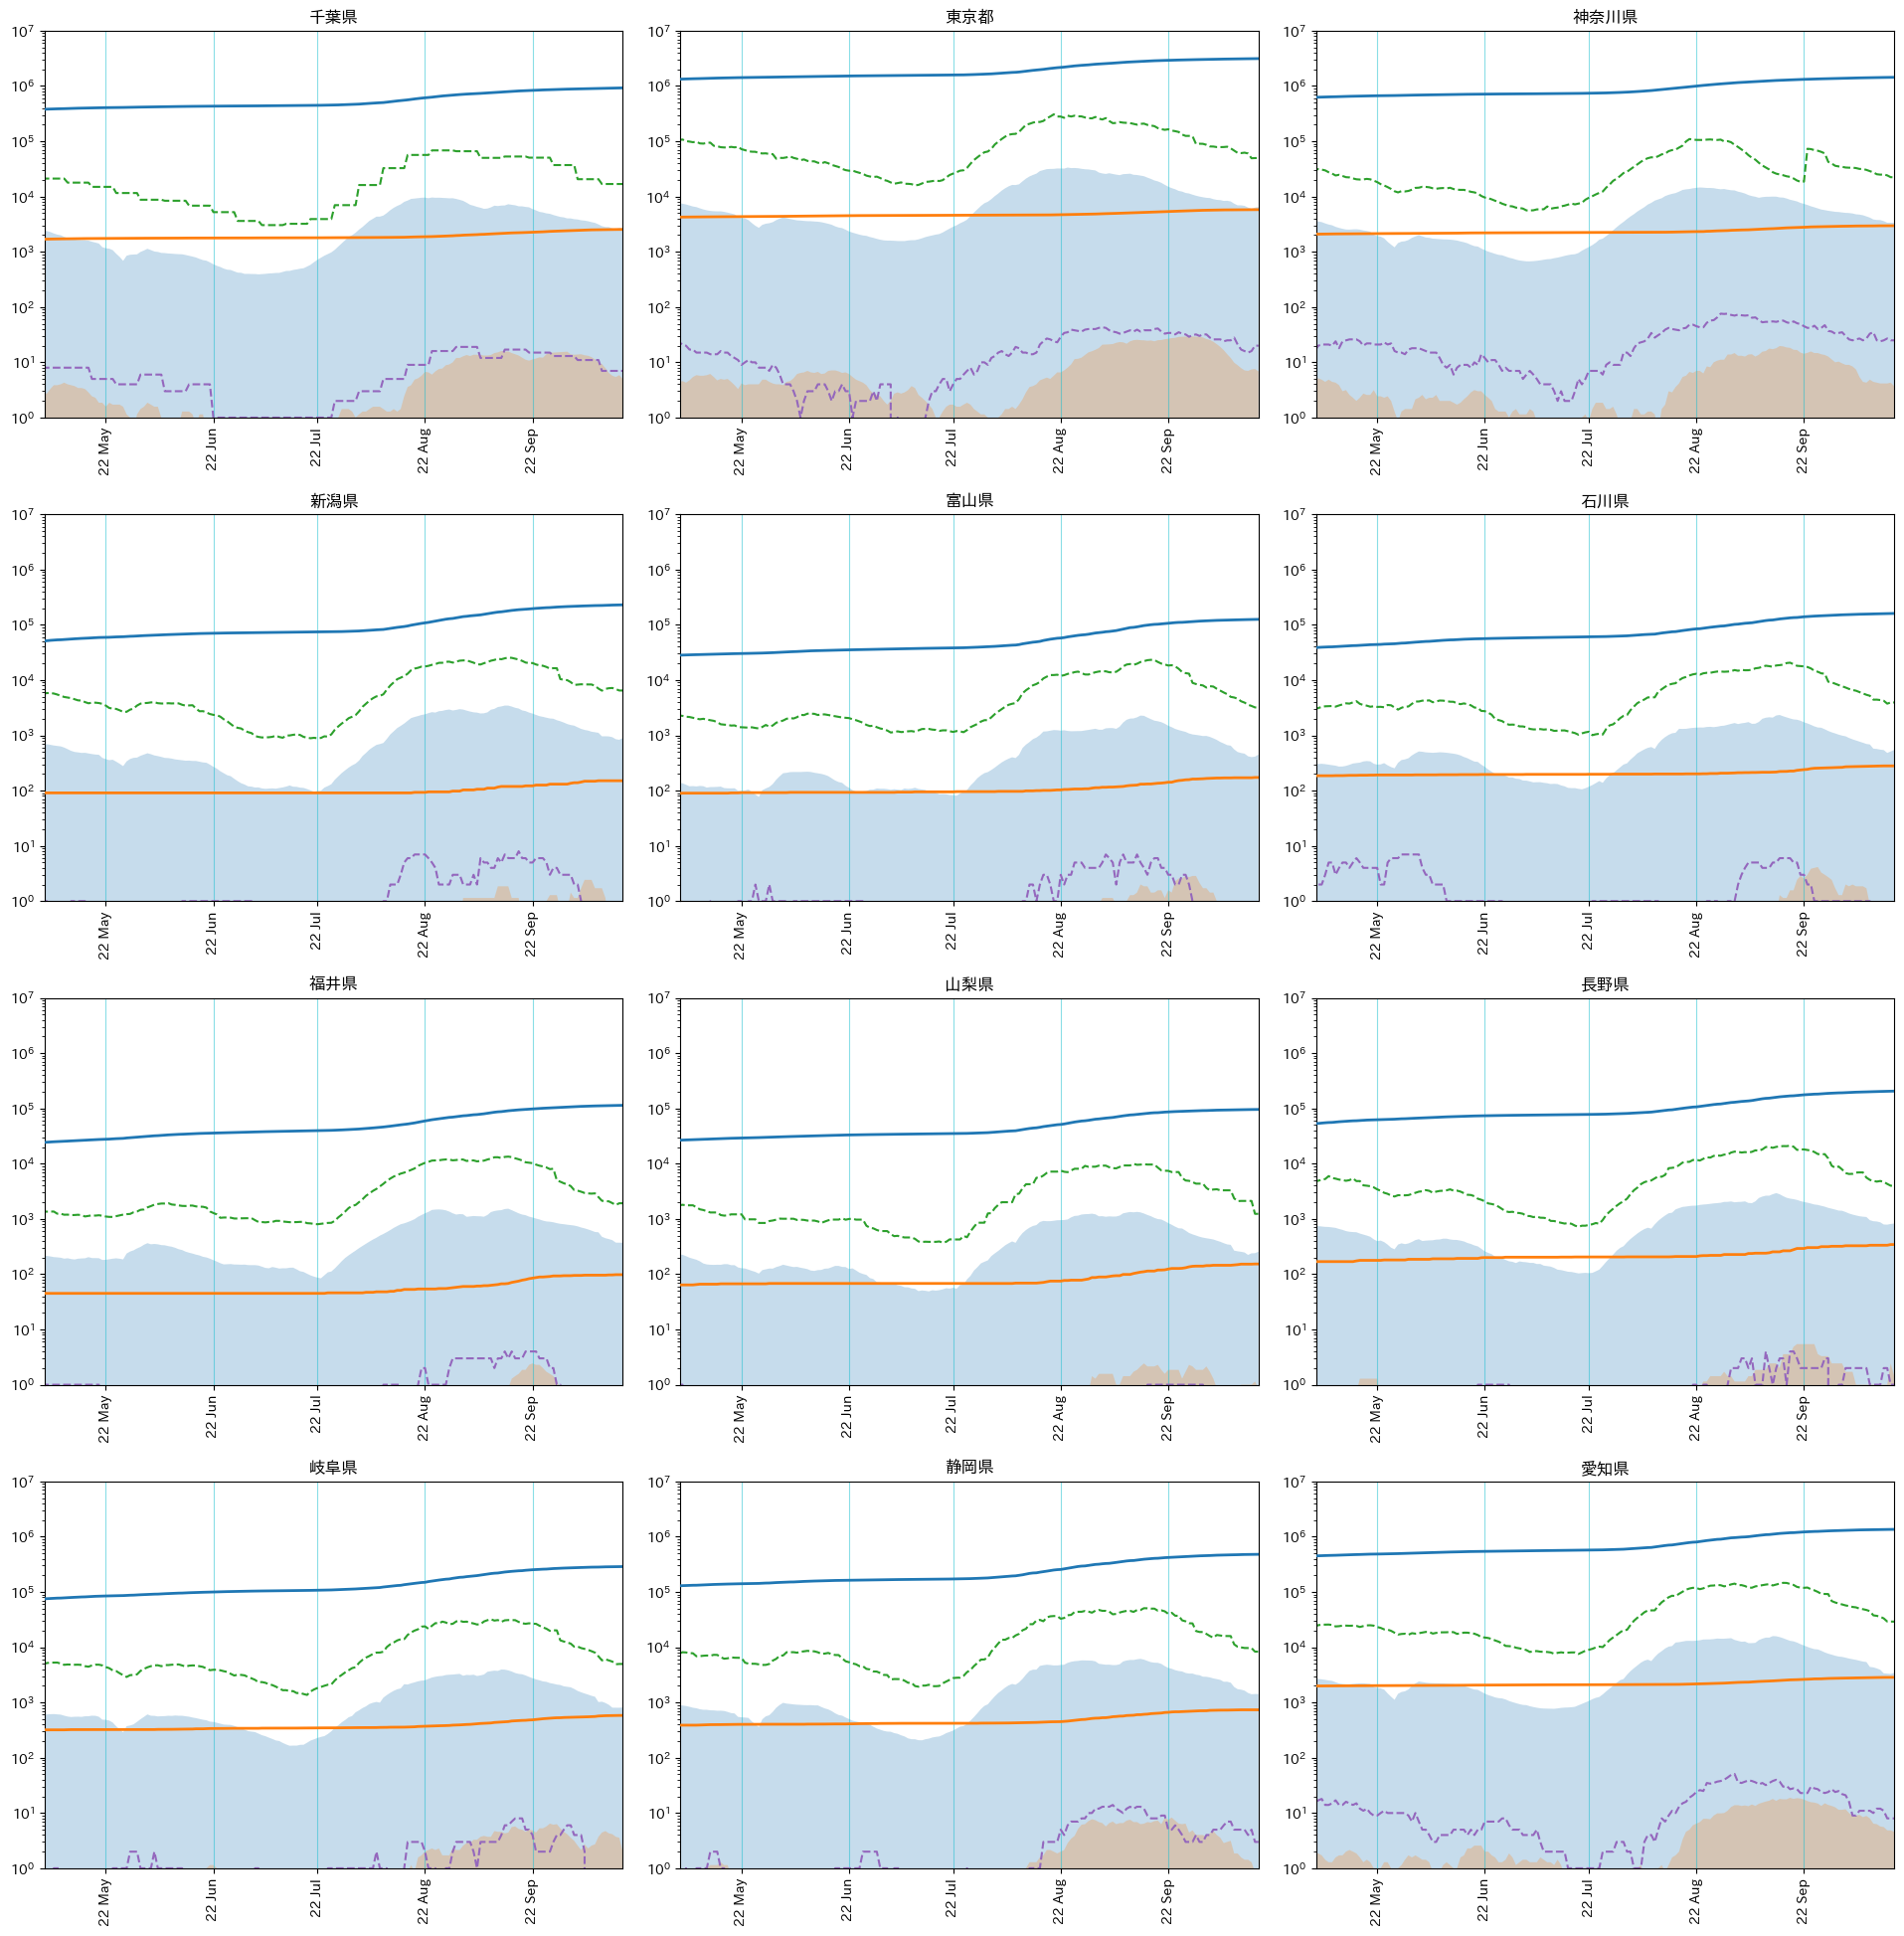

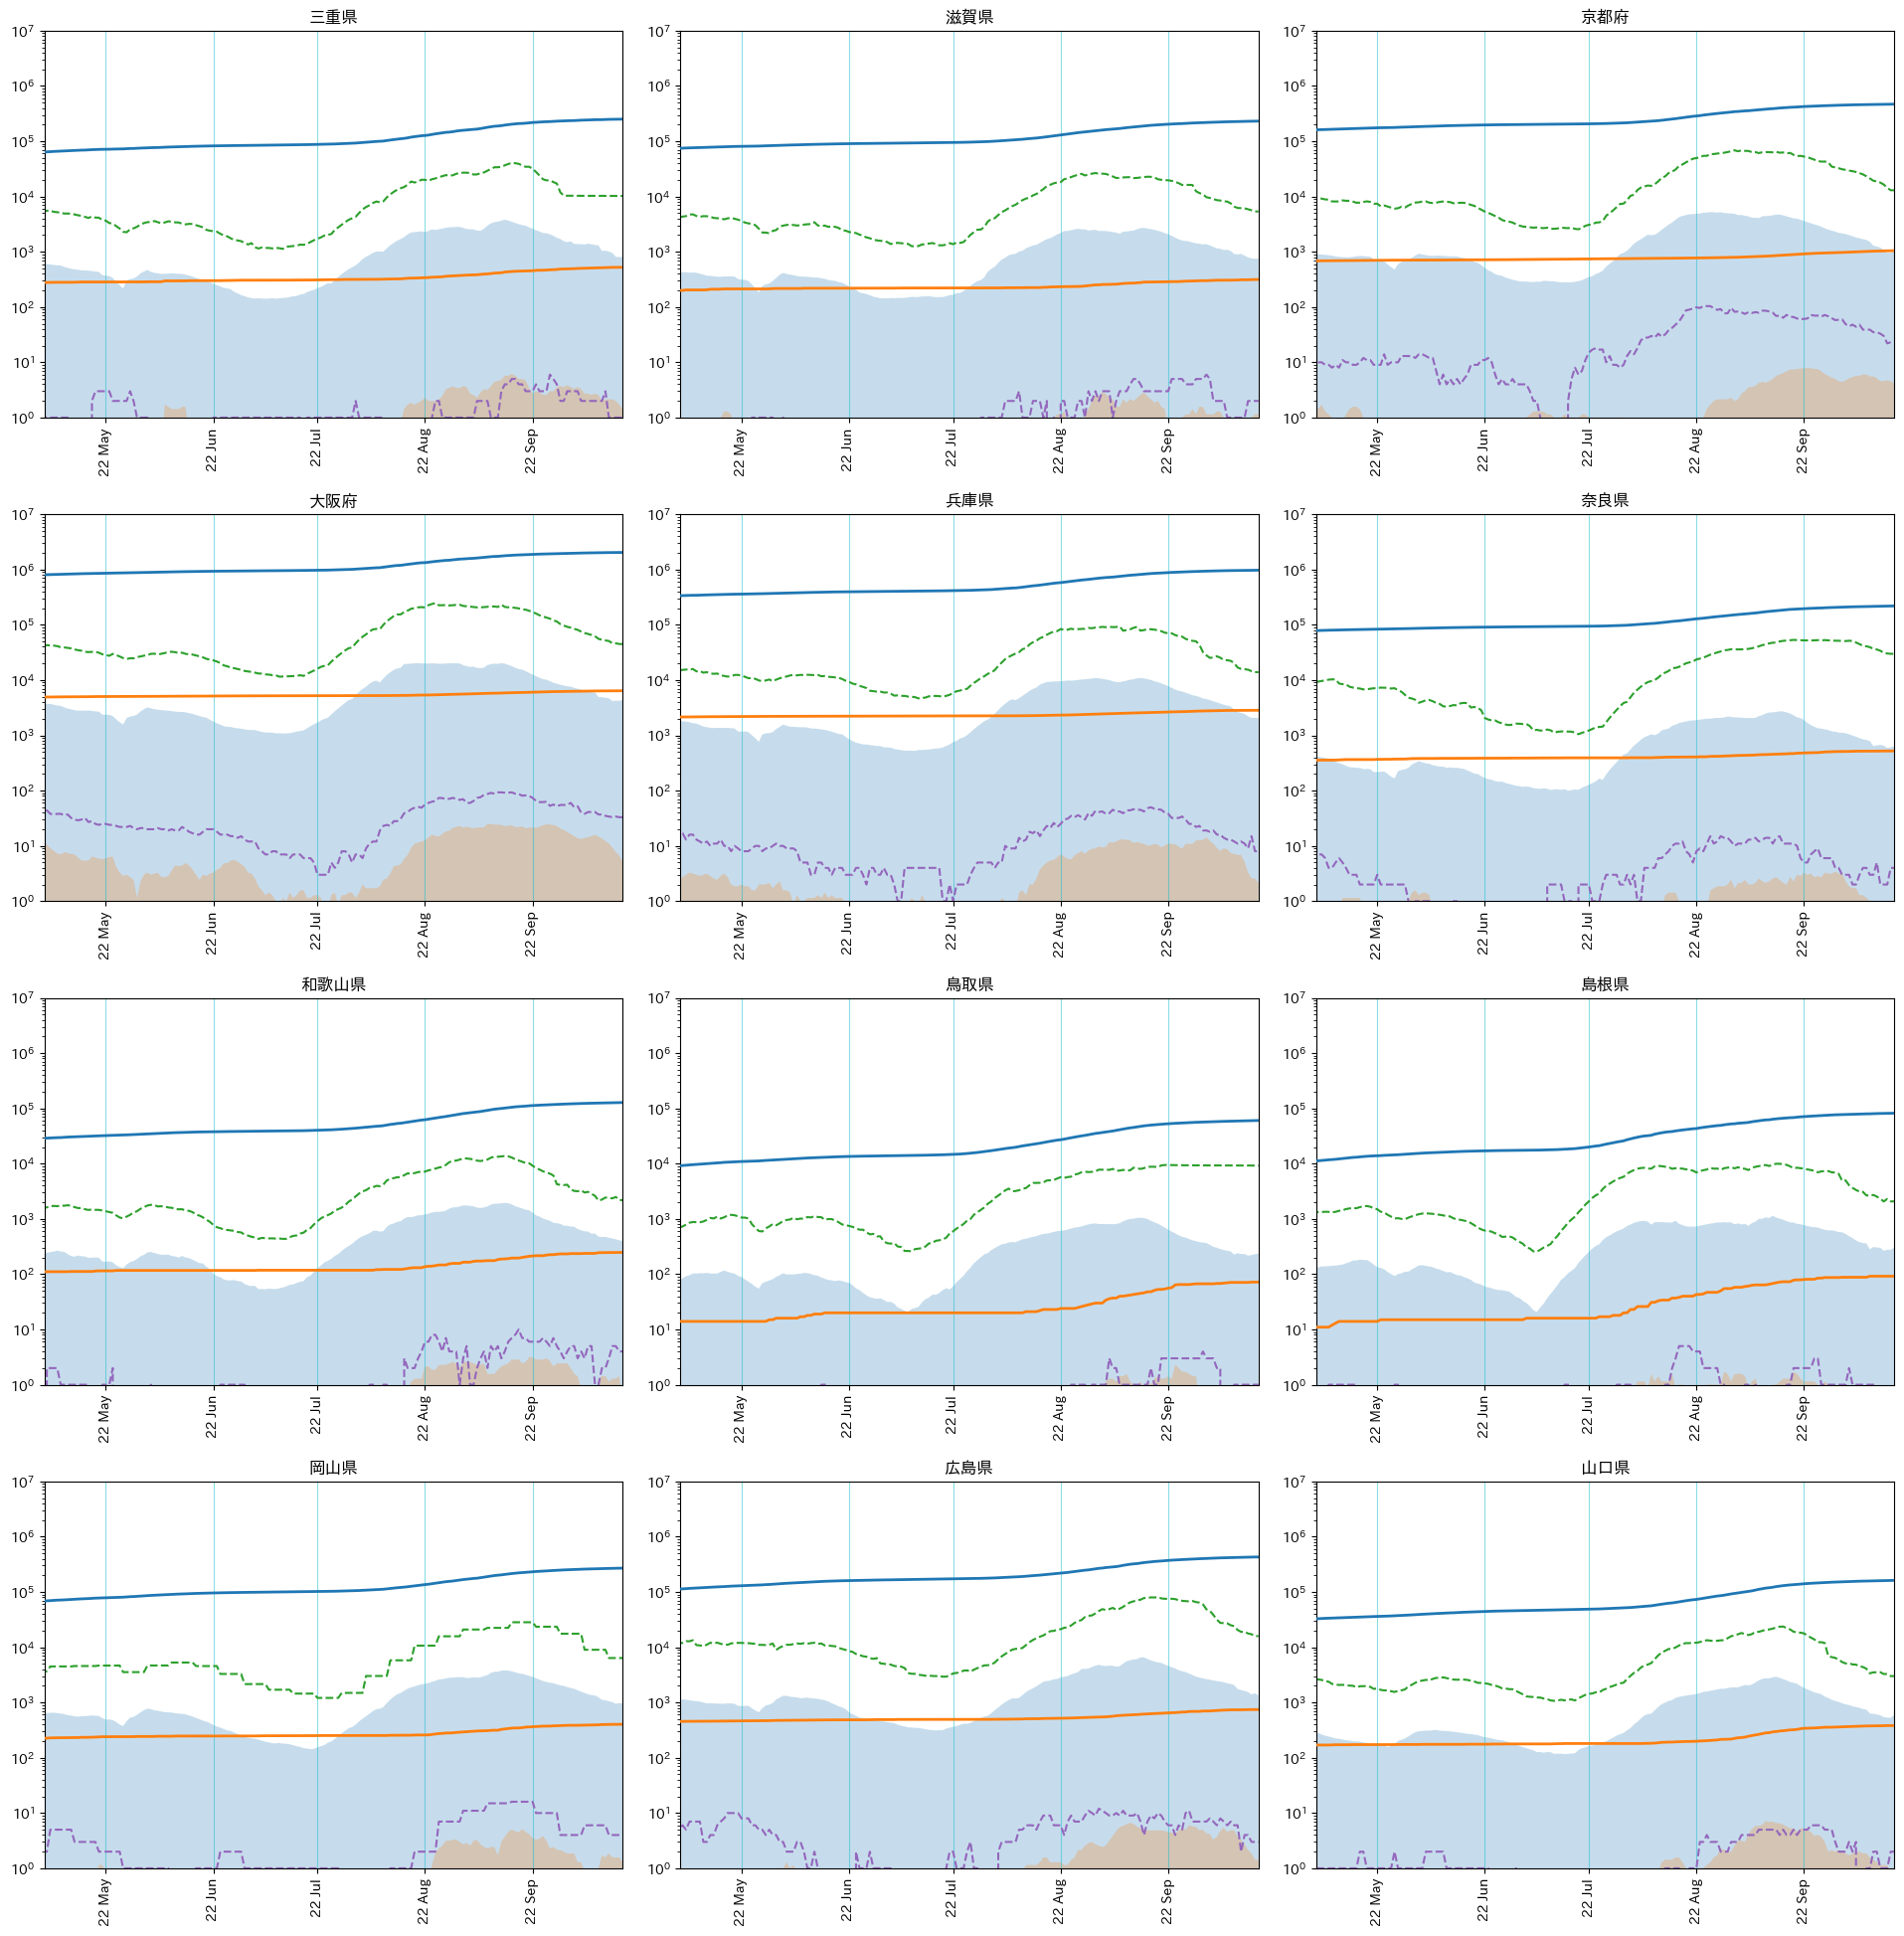

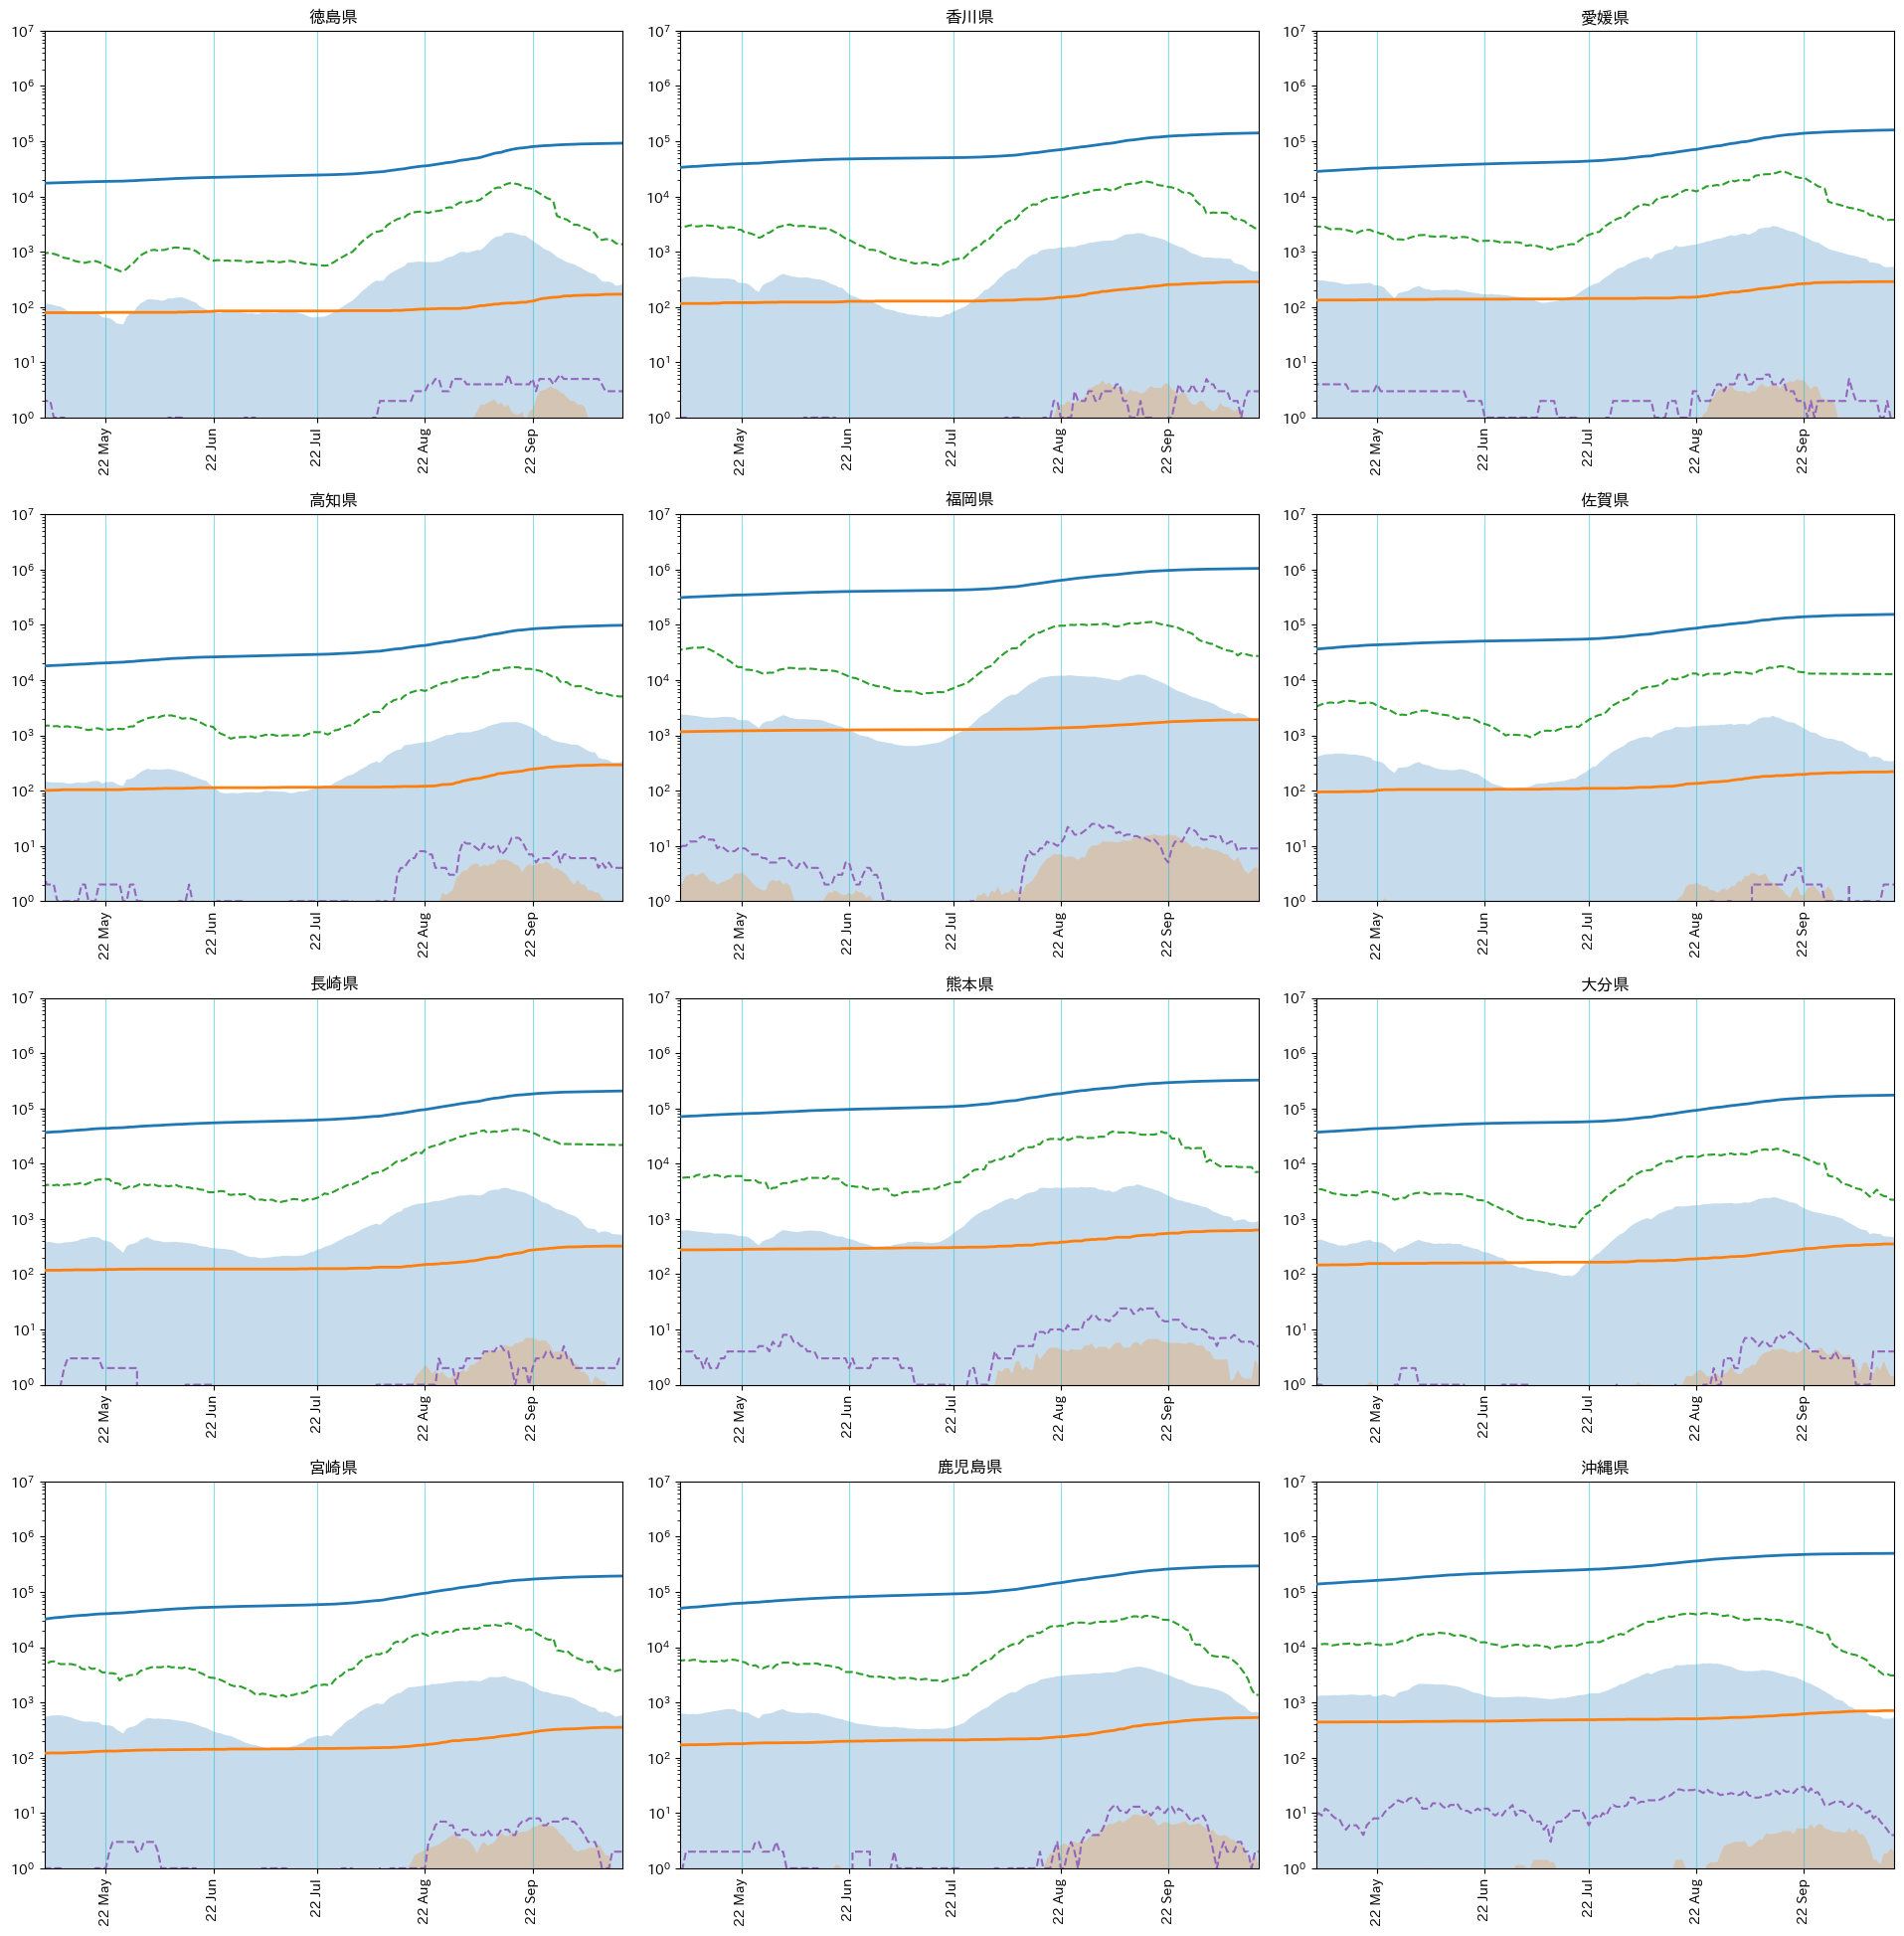

In [4]:
# 全国+47都道府県を4つに分けて描画し，グラフに保存
for sid in range(4):
    pref_set = EN_pref[sid*12:(sid+1)*12]
    fig, ax = plot_pref(pref_set, back_weeks=24)
    #fig.savefig('fig/CoVid19-Japan-cases_by_pref-{}.png'.format(sid), bbox_inches='tight')